# Financial Planning with APIs and Simulations

In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio - *inputted values*
btc_coins = 1.2
eth_coins = 5.3

In [4]:
# The monthly amount for the member's household income - *inputted values*
monthly_income = 12000

In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [6]:
# API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Review the JSON response
print(json.dumps(btc_response, indent=4, sort_keys=True))

{
    "data": {
        "1": {
            "circulating_supply": 19097087,
            "id": 1,
            "last_updated": 1658178522,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 410680575755,
                    "percent_change_1h": -0.335375293109418,
                    "percent_change_24h": 2.58610770398241,
                    "percent_change_7d": 3.05619442404104,
                    "percentage_change_1h": -0.335375293109418,
                    "percentage_change_24h": 2.58610770398241,
                    "percentage_change_7d": 3.05619442404104,
                    "price": 21497.0,
                    "volume_24h": 53185246290
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19097087,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrencie

In [7]:
# API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Review the JSON response
print(json.dumps(eth_response, indent=4, sort_keys=True))

{
    "data": {
        "1027": {
            "circulating_supply": 119732735,
            "id": 1027,
            "last_updated": 1658178568,
            "max_supply": 119732309,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 176381914240,
                    "percent_change_1h": 0.466092043408763,
                    "percent_change_24h": 9.50819585369165,
                    "percent_change_7d": 26.0265159147234,
                    "percentage_change_1h": 0.466092043408763,
                    "percentage_change_24h": 9.50819585369165,
                    "percentage_change_7d": 26.0265159147234,
                    "price": 1473.27,
                    "volume_24h": 23743112256
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 119732735,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_crypto

In [8]:
# Access the current price of BTC
btc_price = btc_response['data']['1']['quotes']['USD']['price']
print(f"The current price of BTC is ${btc_price: .2f}.")

The current price of BTC is $ 21497.00.


In [9]:
# Access the current price of ETH
eth_price = eth_response['data']['1027']['quotes']['USD']['price']
print(f"The current price of ETH is ${eth_price: .2f}.")

The current price of ETH is $ 1473.27.


In [10]:
# Compute the current value of the BTC holding 
btc_value = btc_coins * btc_price
print(f"The total value of your holdings of BTC is ${btc_value: .2f}.")

The total value of your holdings of BTC is $ 25796.40.


In [11]:
# Compute the current value of the ETH holding 
eth_value = eth_coins * eth_price
print(f"The total value of your holdings of BTC is ${eth_value: .2f}.")

The total value of your holdings of BTC is $ 7808.33.


In [12]:
# Compute the total value of the cryptocurrency wallet
total_crypto_wallet = btc_value + eth_value
print(f"The current value of all of your cryptocurrency holdings is ${total_crypto_wallet: .2f}.")

The current value of all of your cryptocurrency holdings is $ 33604.73.


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In [13]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio - *inputted values*
spy_shares = 110
agg_shares = 200

In [14]:
# Setup the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2.3.0"
)

In [15]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ["SPY", "AGG"]

# Set timeframe to 1Day
timeframe = "1D"

# Format current date as ISO format, start and end date set to previous closed trading day
start_date = pd.Timestamp("2022-07-15", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-07-15", tz="America/New_York").isoformat()

In [16]:
# Create the DataFrame
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
df_portfolio = df_portfolio.pivot_table(columns=['symbol'], values='close', index=df_portfolio.index.date)
df_portfolio


symbol,AGG,SPY
2022-07-15,102.25,385.13


In [17]:
# Access the closing price for AGG from the Alpaca DataFrame
agg_close_price = df_portfolio.iloc[0,0]
agg_close_price

102.25

In [18]:
# Access the closing price for SPY from the Alpaca DataFrame
spy_close_price = df_portfolio.iloc[0,1]
spy_close_price

385.13

In [19]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_shares * agg_close_price
print(f"The current value of your bond portfolio is ${agg_value: .2f}.")

The current value of your bond portfolio is $ 20450.00.


In [20]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_shares * spy_close_price
print(f"The current value of your stock portfolio is ${spy_value: .2f}.")

The current value of your stock portfolio is $ 42364.30.


In [21]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value
print(f"The current value of the stock and bond portfolio is ${total_stocks_bonds: .2f}.")

The current value of the stock and bond portfolio is $ 62814.30.


In [22]:
# Calculate the total value of the member's entire savings portfolio
total_portfolio = total_crypto_wallet + total_stocks_bonds
print(f"The total value of your entire portfolio is ${total_portfolio: .2f}.")

The total value of your entire portfolio is $ 96419.03.


### Evaluate the Emergency Fund

In [23]:
# Consolidate financial assets data into a Python list
savings_data = [total_crypto_wallet, total_stocks_bonds]

# Review the Python list savings_data
savings_data
    

[33604.731, 62814.3]

In [24]:
# Create the DataFrame
savings_df = pd.DataFrame(
    savings_data, 
    columns=["Amount"], 
    index=["Crypto", "Stock/Bonds"]
)

savings_df

,Amount
Crypto,33604.731
Stock/Bonds,62814.300


<AxesSubplot:title={'center':'Customer Portfolio Allocations'}, ylabel='Amount'>

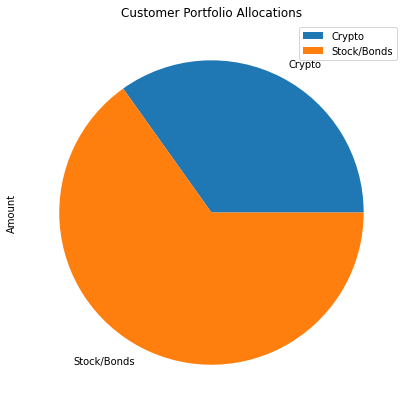

In [25]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot.pie(y='Amount', figsize = (7, 7), title = "Customer Portfolio Allocations")

In [26]:
# Set the value of the emergency fund to 3 months of the customer's montly income
emergency_fund_value = monthly_income * 3

In [27]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio > emergency_fund_value:
    print(f"Congratulations, you have enough money in your investment portfolio to fund an emergency savings account!")
elif total_portfolio == emergency_fund_value:
    print(f"Congratulations, you have met an important financial goal!")
elif total_portfolio < emergency_fund_value:
    print(f"Your investment portfolio is below your required savings amount, you need to save ${abs(total_portfolio-emergency_fund_value): .2f} in order to achieve a 3 month emergency fund.")

Congratulations, you have enough money in your investment portfolio to fund an emergency savings account!


## Part 2: Create a Financial Planner for Retirement

In [28]:
# Set start and end dates of 3 years of data (limited by Alpaca API)
start_date = pd.Timestamp("2019-07-15", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-07-15", tz="America/New_York").isoformat()

In [29]:
# API call to get the 3 years worth of pricing data
retirement_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df
retirement_df
retirement_df = retirement_df.drop(columns=['trade_count','vwap'])

# Reorganize the DataFrame
# Separate ticker data
AGG = retirement_df[retirement_df['symbol']=='AGG'].drop('symbol', axis=1)
SPY = retirement_df[retirement_df['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
retirement_df=pd.concat([AGG, SPY], axis=1, keys=["AGG", "SPY"])

retirement_df.head()
retirement_df.tail()

AGG                                        SPY  \
                             open    high       low   close   volume    open   
timestamp                                                                      
2022-07-11 04:00:00+00:00  101.67  101.92  101.6029  101.70  5758310  385.91   
2022-07-12 04:00:00+00:00  102.02  102.19  101.8200  101.84  6664991  383.66   
2022-07-13 04:00:00+00:00  101.23  102.24  101.1900  102.21  6514247  375.09   
2022-07-14 04:00:00+00:00  101.51  101.98  101.3300  101.85  6224496  373.99   
2022-07-15 04:00:00+00:00  101.94  102.35  101.9000  102.25  8440151  382.62   

                                                                
                               high      low   close    volume  
timestamp                                                       
2022-07-11 04:00:00+00:00  386.8700  383.500  384.23  58100363  
2022-07-12 04:00:00+00:00  386.1600  378.990  380.83  62027220  
2022-07-13 04:00:00+00:00  381.9200  374.658  378.83  83575452  
2022-07-14 04:00:00+00:00  379.0498  371.040  377.91  89349688  
2022-07-15 04:00:00+00:00  385.2500  380.540  385.13  79318992

In [30]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns with 
# 40/60 split bonds and stocks respectively
retirement_MC = MCSimulation(
    portfolio_data = retirement_df,
    weights = [.4, .6],
    num_simulation = 500,
    num_trading_days=252*30
)

retirement_MC.portfolio_data.head()

AGG                                    \
                             open     high     low   close   volume   
timestamp                                                             
2019-07-15 04:00:00+00:00  110.87  110.960  110.85  110.95  3619089   
2019-07-16 04:00:00+00:00  110.75  110.830  110.64  110.83  2149083   
2019-07-17 04:00:00+00:00  110.93  111.140  110.91  111.12  2985610   
2019-07-18 04:00:00+00:00  111.10  111.330  111.06  111.30  5982223   
2019-07-19 04:00:00+00:00  111.22  111.286  111.14  111.17  3150774   

                                           SPY                          \
                          daily_return    open    high     low   close   
timestamp                                                                
2019-07-15 04:00:00+00:00          NaN  301.12  301.13  300.19  300.75   
2019-07-16 04:00:00+00:00    -0.001082  300.64  300.88  299.44  299.71   
2019-07-17 04:00:00+00:00     0.002617  299.77  299.93  297.74  297.74   
2019-07-18 04:00:00+00:00     0.001620  297.18  299.25  296.70  298.83   
2019-07-19 04:00:00+00:00    -0.001168  300.01  300.07  296.96  297.17   

                                                  
                             volume daily_return  
timestamp                                         
2019-07-15 04:00:00+00:00  33992129          NaN  
2019-07-16 04:00:00+00:00  40807546    -0.003458  
2019-07-17 04:00:00+00:00  44343835    -0.006573  
2019-07-18 04:00:00+00:00  53567032     0.003661  
2019-07-19 04:00:00+00:00  76794138    -0.005555

In [31]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
retirement_MC.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Ryan Mangum\Desktop\FinTech_Workspace\Challenges\Challenge_5\Financial_Planner_Emergencies_-_Retirement\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.010158,1.006089,1.012726,1.016649,0.999649,1.003067,1.006130,1.011530,1.002096,0.985970,...,1.018597,1.003919,0.985874,0.988933,0.994466,1.003892,0.994596,1.010284,1.006244,1.006597
2,1.004113,0.999141,1.007267,1.019494,0.995039,1.006817,0.999641,1.014879,1.015207,0.986795,...,1.010372,1.001744,0.997299,0.985474,1.001831,1.008855,0.994687,1.015247,1.001057,1.021770
3,0.993511,0.985481,1.001803,1.011331,0.986608,0.997901,0.989217,1.014607,1.016125,0.973712,...,1.017705,0.999493,0.999431,0.993382,1.003622,1.005786,0.994408,1.008402,1.013694,1.007874
4,1.005082,0.963286,0.995859,1.007377,0.976485,0.999034,0.995521,1.008130,1.015876,0.981529,...,1.025086,0.996970,0.978743,0.985847,1.006478,1.014873,0.981078,1.002778,1.025083,1.020748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,8.075809,16.105709,2.432994,6.478448,1.886632,0.824700,18.587540,1.727281,3.908090,3.972193,...,4.783214,9.800737,5.592622,1.360297,27.636446,3.230863,5.068558,11.992589,1.283609,2.997208
7557,7.948999,16.173579,2.451303,6.402550,1.903851,0.826904,18.600963,1.733561,3.915706,3.907890,...,4.785520,9.828189,5.613842,1.386686,27.242565,3.214172,5.103830,12.141075,1.289260,3.036000
7558,8.035642,15.948037,2.436625,6.392624,1.909864,0.838800,19.029802,1.716976,3.974693,3.907123,...,4.731145,9.958499,5.642710,1.388454,27.192116,3.251017,5.084781,12.211250,1.277440,2.966098
7559,8.148026,15.741851,2.452767,6.481575,1.899059,0.828181,18.940675,1.701376,3.952264,3.895980,...,4.681961,9.888264,5.645113,1.394295,27.555907,3.237679,5.135144,12.068445,1.275446,2.978170


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

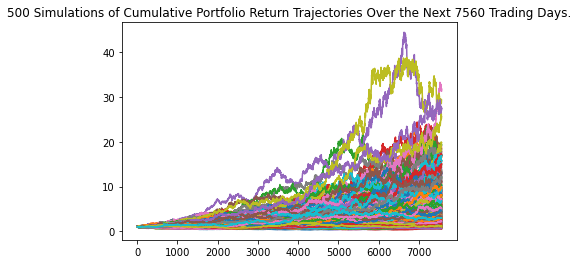

In [32]:
# Visualize the 30-year Monte Carlo simulation
retirement_MC.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

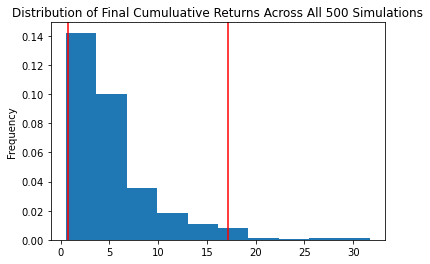

In [33]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation
retirement_MC.plot_distribution()

In [34]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
retirement_summary_statistics = retirement_MC.summarize_cumulative_return()

retirement_summary_statistics

count           500.000000
mean              5.375465
std               4.597924
min               0.531229
25%               2.160187
50%               4.108943
75%               6.690100
max              31.742369
95% CI Lower      0.807419
95% CI Upper     17.202851
Name: 7560, dtype: float64

### Analyze the Retirement Portfolio Forecasts

In [35]:
total_stocks_bonds

62814.3

In [36]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = round(retirement_summary_statistics[8] * total_stocks_bonds, 2)
ci_upper_thirty_cumulative_return = round(retirement_summary_statistics[9] * total_stocks_bonds, 2)

print(f"With a 95% confidence level, the total value of your stock and bond portfolio will be between ${ci_lower_thirty_cumulative_return: .2f} and {ci_upper_thirty_cumulative_return: .2f} in the next 30 years.")

With a 95% confidence level, the total value of your stock and bond portfolio will be between $ 50717.47 and  1080585.07 in the next 30 years.


### Forecast Cumulative Returns in 10 Years

In [37]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns with a 20/80 split between bonds and stocks respectively
ten_year_retirement_MC=MCSimulation(
    portfolio_data=retirement_df,
    weights=[.2, .8],
    num_simulation=500,
    num_trading_days=252*10
)

ten_year_retirement_MC.portfolio_data.head()

AGG                                    \
                             open     high     low   close   volume   
timestamp                                                             
2019-07-15 04:00:00+00:00  110.87  110.960  110.85  110.95  3619089   
2019-07-16 04:00:00+00:00  110.75  110.830  110.64  110.83  2149083   
2019-07-17 04:00:00+00:00  110.93  111.140  110.91  111.12  2985610   
2019-07-18 04:00:00+00:00  111.10  111.330  111.06  111.30  5982223   
2019-07-19 04:00:00+00:00  111.22  111.286  111.14  111.17  3150774   

                                           SPY                          \
                          daily_return    open    high     low   close   
timestamp                                                                
2019-07-15 04:00:00+00:00          NaN  301.12  301.13  300.19  300.75   
2019-07-16 04:00:00+00:00    -0.001082  300.64  300.88  299.44  299.71   
2019-07-17 04:00:00+00:00     0.002617  299.77  299.93  297.74  297.74   
2019-07-18 04:00:00+00:00     0.001620  297.18  299.25  296.70  298.83   
2019-07-19 04:00:00+00:00    -0.001168  300.01  300.07  296.96  297.17   

                                                  
                             volume daily_return  
timestamp                                         
2019-07-15 04:00:00+00:00  33992129          NaN  
2019-07-16 04:00:00+00:00  40807546    -0.003458  
2019-07-17 04:00:00+00:00  44343835    -0.006573  
2019-07-18 04:00:00+00:00  53567032     0.003661  
2019-07-19 04:00:00+00:00  76794138    -0.005555

In [38]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
ten_year_retirement_MC.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Ryan Mangum\Desktop\FinTech_Workspace\Challenges\Challenge_5\Financial_Planner_Emergencies_-_Retirement\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004066,1.018909,1.006313,1.018220,0.998460,0.983029,0.994672,1.003297,1.002945,0.990865,...,0.993988,0.995723,1.006358,1.003710,0.985715,0.994407,1.017754,0.998943,0.991215,0.979264
2,0.997444,1.005373,1.000041,1.011324,0.981210,0.981788,0.998279,0.987296,1.007424,0.980292,...,0.972728,0.997405,0.986868,1.000252,0.998022,0.977464,1.007888,0.991391,0.981511,0.958970
3,0.998827,1.002030,1.008495,1.014214,0.984381,0.999016,1.007711,1.009225,1.005070,0.981243,...,0.951967,0.995055,0.991158,1.017991,0.980731,0.967024,1.004129,1.000584,0.984410,0.960575
4,0.988624,1.002567,1.013724,1.008748,0.990600,0.991403,0.999944,1.012210,1.019500,1.001002,...,0.964421,0.984070,0.991453,1.019402,0.991766,0.961685,0.994154,0.995465,0.998658,0.944189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.359258,2.960988,2.872223,1.311383,1.532403,3.127168,1.682900,2.617190,1.757634,2.292283,...,1.236041,2.124256,2.053429,0.638028,4.354595,3.056273,1.097124,5.473195,4.040560,5.488242
2517,2.367689,2.961790,2.834431,1.311965,1.519329,3.128085,1.664252,2.620982,1.730311,2.295504,...,1.257446,2.053858,2.082413,0.651406,4.371512,3.009378,1.095709,5.454905,3.967007,5.609066
2518,2.363130,2.931437,2.878362,1.335119,1.523640,3.101427,1.638877,2.666007,1.723568,2.303401,...,1.280256,2.046187,2.087980,0.642293,4.321309,2.954071,1.100300,5.627217,3.973715,5.557343
2519,2.317863,2.940378,2.865034,1.310873,1.509226,3.115241,1.639386,2.762123,1.731514,2.230735,...,1.272354,2.035235,2.072359,0.635262,4.286558,2.996205,1.103629,5.589006,3.989958,5.608167


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

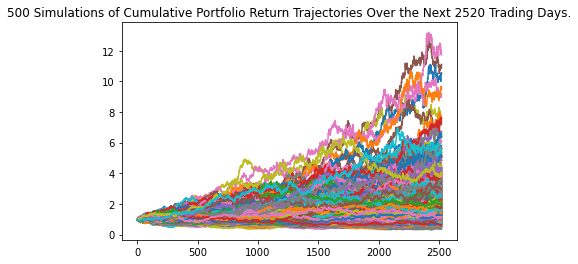

In [39]:
# Visualize the 10-year Monte Carlo simulation
ten_year_retirement_MC.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

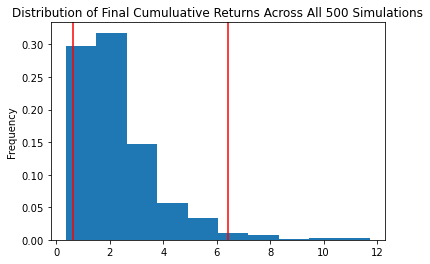

In [40]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation
ten_year_retirement_MC.plot_distribution()

In [41]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
ten_year_summary_statistics = ten_year_retirement_MC.summarize_cumulative_return()

ten_year_summary_statistics

count           500.000000
mean              2.312515
std               1.561910
min               0.353690
25%               1.296873
50%               1.881028
75%               2.944587
max              11.736290
95% CI Lower      0.620682
95% CI Upper      6.404745
Name: 2520, dtype: float64

In [42]:
total_stocks_bonds

62814.3

In [43]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = round(ten_year_summary_statistics[8] * total_stocks_bonds, 2)
ci_upper_ten_cumulative_return = round(ten_year_summary_statistics[9] * total_stocks_bonds, 2)

print(f"With a 95% confidence level, the total value of your stock and bond portfolio will be between ${ci_lower_ten_cumulative_return: .2f} and {ci_upper_ten_cumulative_return: .2f} in the next 10 years.")

With a 95% confidence level, the total value of your stock and bond portfolio will be between $ 38987.73 and  402309.59 in the next 10 years.


**Analysis** Unfortunately weighing the portfolio heavier with stocks, does not allow the customer to retire in 10 years.